# Simple Linear Regression


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 


## Reading the dataset

In [10]:
 df = pd.read_csv('height_weight_dataset.csv')
display(df)

,ID,Height(cm),Weight(kg)
0,1,188,83.9
1,2,178,79.9
2,3,164,70.1
3,4,192,82.5
4,5,157,75.4
5,6,170,84.4
6,7,188,82.8
7,8,168,77.5
8,9,172,71.4
9,10,160,70.0


In [16]:
df = df.drop('ID', axis=1)
#'ID' is the column name to drop.
# axis=1 tells pandas you're dropping a column (use axis=0 for rows).

In [18]:
display(df)

,Height(cm),Weight(kg)
0,188,83.9
1,178,79.9
2,164,70.1
3,192,82.5
4,157,75.4
5,170,84.4
6,188,82.8
7,168,77.5
8,172,71.4
9,160,70.0


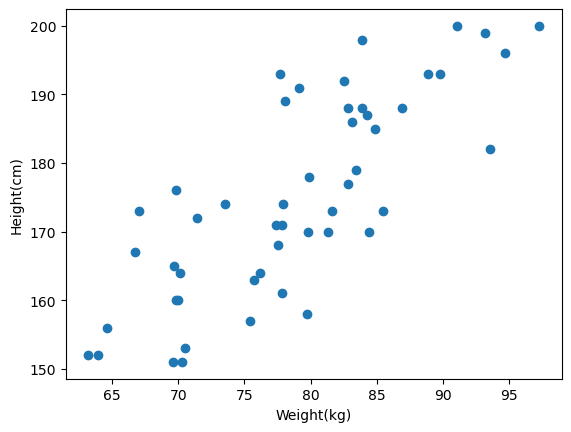

In [26]:
plt.scatter(df['Weight(kg)'] , df['Height(cm)'])
plt.xlabel("Weight(kg)")
plt.ylabel("Height(cm)")
plt.show()


# Divide Dataset into indepnednent and dependent feutures
X = df['Weight(kg)'] ## Independent 
y = df['Height(cm)'] ## Dependent 



In [53]:
# Divide Dataset into indepnednent and dependent feutures
X = df[['Weight(kg)']] ## Independent 
y = df['Height(cm)'] ## Dependent 



# Train Test split of the Dataset

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20 , random_state=42)

In [65]:
X.shape

(50, 1)

In [67]:
y.shape

(50,)

In [69]:
X_train.shape

(40, 1)

In [71]:
X_train.shape

(40, 1)

In [73]:
y_train.shape

(40,)

In [75]:
y_test.shape

(10,)

 # Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

 ### Standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)


Great question! Let's break it down with **intuition**, **why it's needed**, and **how it's done**:

---

## 🚀 Why Standardization is Needed in Data Preprocessing

Standardization makes your model more **fair, faster, and accurate** by bringing all features to the **same scale**.

---

### 🔍 The Problem: Different Scales

Suppose your dataset has:

* **Height**: 150 to 200 cm
* **Weight**: 40 to 100 kg

Now add:

* **Age**: 18 to 25 years
* **Income**: 10,000 to 100,000

🤔 A model like **Linear Regression**, **KNN**, or **SVM** might think that **income** is more important than **age** — **just because it has bigger numbers**, not because it actually matters more.

---

### 🧠 The Intuition

Standardization:

* **Centers** the data around 0 (mean = 0)
* **Scales** it so that all features have a standard deviation of 1

This removes the "bias of scale" so models can **treat all features equally** and **converge faster** in training.

---

## ✅ When Standardization Helps

It is **critical** for models that are:

* **Distance-based** (e.g., KNN, SVM)
* **Gradient-based** (e.g., Logistic Regression, Neural Networks)
* **PCA, Clustering**, etc.

Not necessary for:

* **Tree-based models** like Decision Trees or Random Forests.

---

## 🛠️ How to Achieve Standardization

### Formula:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

Where:

* $\mu$ = mean of the feature
* $\sigma$ = standard deviation of the feature

### In Code:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Don't fit again!
```

---

### 🧪 Before vs After

| Feature | Original Range | Standardized Range |
| ------- | -------------- | ------------------ |
| Height  | 150–200        | -1.5 to 1.5        |
| Weight  | 40–100         | -1.5 to 1.5        |
| Age     | 18–25          | -1.5 to 1.5        |

---

### 🔑 Summary

* Different scales confuse models.
* Standardization fixes it by putting all features on the same "playing field".
* It speeds up learning and improves performance for many models.

Want to visualize how the distribution changes before and after standardization? I can show you a chart!


In [86]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

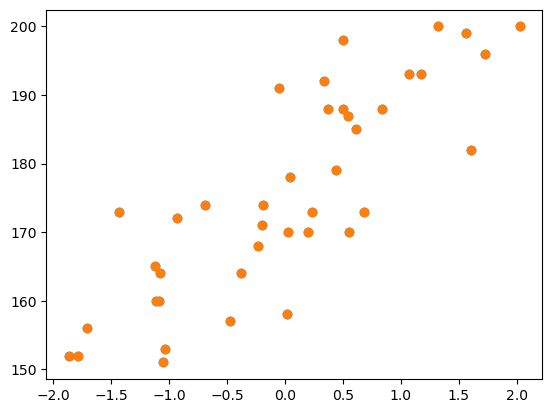

In [90]:
plt.scatter(X_train , y_train)
plt.show()

## Train the Simple Linear Regression Model

In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [99]:
print("The Slope  or coefficient of weight is " ,regressor.coef_)
print ("The Intercept is " , regressor.intercept_)

The Slope  or coefficient of weight is  [12.44916043]
The Intercept is  175.425


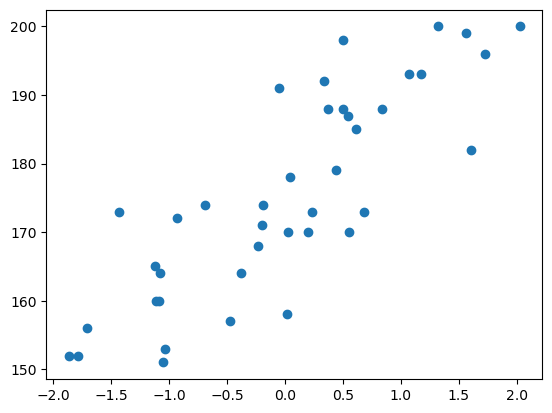

In [101]:
plt.scatter(X_train , y_train)
plt.show()

#### Best Fit Line

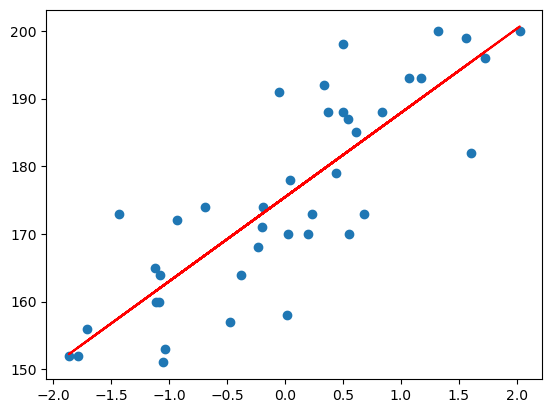

In [110]:
plt.scatter(X_train , y_train)
pred_y = regressor.predict(X_train) # pred_y = 12.44916043 * X_train + 175.425 fromula use kortesi predict korar jonno 
plt.plot(X_train , pred_y , color ='r')
plt.show()

In [114]:
pred_y_test = regressor.predict(X_test)
pred_y_test , y_test

(array([173.39027615, 180.49227911, 161.60095124, 157.1977094 ,
        161.31687112, 169.98131473, 172.39599574, 172.96415597,
        180.06615894, 172.82211591]),
 13    189
 39    186
 30    176
 45    167
 17    151
 48    163
 26    171
 25    161
 32    177
 19    193
 Name: Height(cm), dtype: int64)

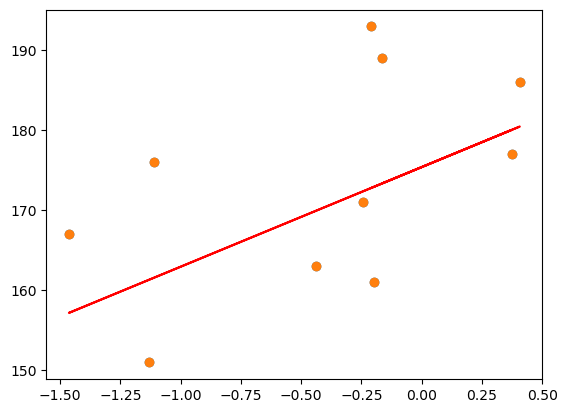

In [118]:
plt.scatter(X_test , y_test)
pred_y_test = regressor.predict(X_test) # pred_y = 12.44916043 * X_test + 175.425 fromula use kortesi predict korar jonno 
plt.plot(X_test , pred_y_test , color ='r')
plt.show()

## Performance Metrics
#### MSE,MAE,RMSE,
#### R square and adjusted R square

Sure! Let's go over the **R² (R-squared) score** and the **Adjusted R² score** with formulas and intuition.

---

## 📈 1. R² (R-squared) Score

### ✅ Formula:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:

* $SS_{\text{res}} = \sum (y_i - \hat{y}_i)^2$ → Residual Sum of Squares (errors)
* $SS_{\text{tot}} = \sum (y_i - \bar{y})^2$ → Total Sum of Squares (variance from mean)

### 📌 Intuition:

* Measures how well the model explains the variance in the data.
* Ranges from **0 to 1**:

  * **1** → perfect fit
  * **0** → model does no better than the mean
  * Can even be **negative** if the model is worse than just using the average.

---

## 🎯 2. Adjusted R² Score

### ✅ Formula:

$$
R^2_{\text{adj}} = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - k - 1} \right)
$$

Where:

* $R^2$ = R-squared score
* $n$ = number of observations (rows)
* $k$ = number of predictors (features)

### 📌 Intuition:

* **Penalizes adding too many features.**
* Helps prevent **overfitting**.
* Adjusted R² increases **only** if the new feature improves the model more than expected by chance.

---

## 🧠 Summary Table

| Metric      | Measures                      | Penalizes extra features | Range       |
| ----------- | ----------------------------- | ------------------------ | ----------- |
| R²          | Variance explained by model   | ❌ No                     | \[−∞, 1]    |
| Adjusted R² | R² adjusted for feature count | ✅ Yes                    | Can be < R² |

Let me know if you want a Python example calculating both using `sklearn`.


In [123]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [125]:
mse = mean_squared_error(y_test , pred_y_test)
mae = mean_absolute_error(y_test , pred_y_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

129.42307283810882
9.922116467903388
11.37642618919091


In [130]:
from sklearn.metrics import r2_score

# Regular R² score
r2 = r2_score(y_test, pred_y_test)

# n = number of samples, k = number of features
n = len(y_test)
k = X_test.shape[1]

# Adjusted R² formula
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)


R² Score: 0.19931283817057155
Adjusted R² Score: 0.09922694294189305


In [132]:
regressor

LinearRegression()

In [142]:
## new data point weight is 81
scaled_weight = scaler.transform([[81]])



C:\Users\ashra\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.16743602])

In [144]:
scaled_weight[0]

array([0.16743602])

In [152]:
pred_height= regressor.predict([scaled_weight[0]])
print("The Height prediction for weight 81 kg is :" , pred_height )

The Height prediction for weight 81 kg is : [177.50943787]


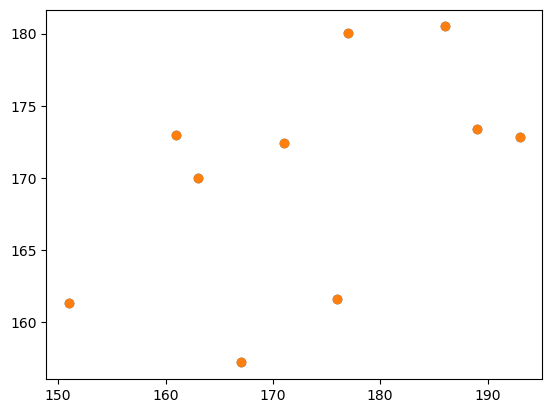

In [156]:
## Assumptions 
### plot a scatter plot for the prediction
plt.scatter(y_test ,pred_y_test)
plt.show()

In [158]:
## residuals 
residuals = y_test - pred_y_test
residuals

13    15.609724
39     5.507721
30    14.399049
45     9.802291
17   -10.316871
48    -6.981315
26    -1.395996
25   -11.964156
32    -3.066159
19    20.177884
Name: Height(cm), dtype: float64

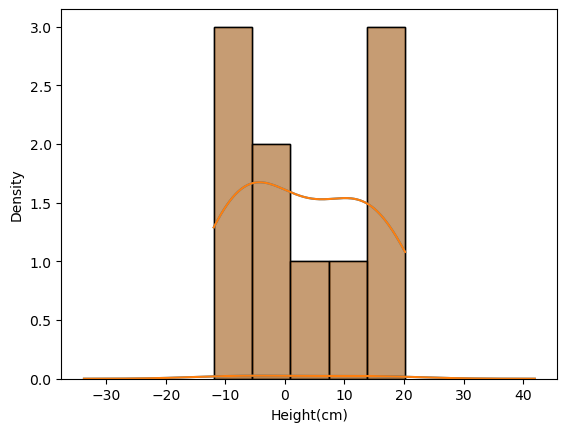

In [167]:
## Plot residuals 
import seaborn as sns
sns.histplot(residuals , kde=True)
plt.show()